<H3>PRI 2022: first project delivery</H3>

**GROUP X**
- name, number
- name, number
- name, number

<H3>Part I: demo of facilities</H3>

In [14]:
from IPython.core.display import HTML

#imports

from mainFunctions.ranking import ranking
from operator import attrgetter
from helper.documentHelper import read_files
from mainFunctions.indexing import indexing
from src.helper.mockDataVisualize import transfer_function_output_ranking
from src.mainFunctions.evaluation import calculate_true_pos, calculate_precision_recall, calculate_fbeta_measure, \
    calculate_precision_recall_tables_and_MAP_param, draw_precision_recall_curve, \
    get_MAP_avg_by_cat_and_standard_deviation, draw_MAP_chart, calculate_statistics
from src.mainFunctions.visualize import visualize

**A) Indexing facilities**

*A.1 Preprocessing options: statistics*

In [15]:
#rare, most common terms


*A.2 Indexing statistics*

In [16]:
#code, statistics and/or charts here
#time, memory

**B) Ranking facilities**

In [17]:
# load files

order_ranked = True
text_processing = True
max_sent = 8
max_chars = 1010
documents = read_files(text_processing, ["business"])

corpus_index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}

for v in corpus_index:
    corpus_idfs[v] = corpus_index[v].inverted_document_frequency

document = documents[32]

summary_tf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})
summary_tfidf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})
summary_bm25 = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})
summary_rrf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})
summary_mmr = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

print(summary_tf)
print("\n")
print(summary_tfidf)

['The BCC found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004.', '"While consumer spending is set to decelerate significantly over the next 12-18 months, it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack."', "The group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years.", '"The pressure on costs and margins, the relentless increase in regulations, and the threat of higher taxes remain serious problems," BCC director general David Frost said.', 'The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said.', 'The outlook for the service sector was "uncertain" despite an increase in exports and orders over the quarter, the BCC noted.', 'However, the BCC found the whole UK economy

*B.1 Summarization solution: results for a given document*

TF Ranking
Precision:  0.5
Recall:  0.5714285714285714
F-beta:  0.5128205128205128
MAP:  0.6178571428571429


/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i],
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i], r[i + 1]), (p[i + 1], p[i + 1]), 'k-', label='', color='red')
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(r, dup_p, 'k--', color='blue')


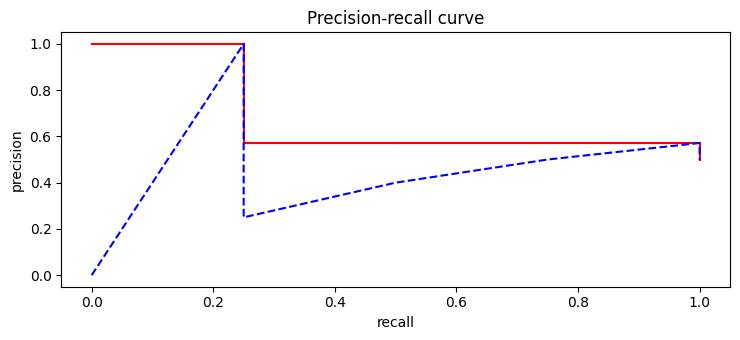

In [18]:
document.summary = summary_tf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
recall_table, precision_table, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)
precision_recall_tuple = (recall_table, precision_table)

print("TF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)
draw_precision_recall_curve(precision_recall_tuple)

*B.2 Classic IR models: differences*

In [19]:
document.summary = summary_tfidf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("TF-IDF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

document.summary = summary_bm25

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("\n")
print("BM25 Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

TF-IDF Ranking
Precision:  0.625
Recall:  0.7142857142857143
F-beta:  0.6410256410256411
MAP:  0.6961904761904762


BM25 Ranking
Precision:  0.625
Recall:  0.7142857142857143
F-beta:  0.6410256410256411
MAP:  0.9666666666666666


*B.3 Reciprocal rank funsion*

In [20]:
document.summary = summary_rrf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("RRF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

RRF Ranking
Precision:  0.625
Recall:  0.7142857142857143
F-beta:  0.6410256410256411
MAP:  0.6783333333333333


*B.4 Maximal Marginal Relevance*

In [21]:
document.summary = summary_mmr

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("MMR Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

MMR Ranking
Precision:  0.125
Recall:  0.14285714285714285
F-beta:  0.1282051282051282
MAP:  1.0


**C) Sentence higlighting facilities**

In [22]:
dict = transfer_function_output_ranking(document.text_sentences, summary_tf)
doc_path = "summaries/summary1"
visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

In [23]:
dict = transfer_function_output_ranking(document.text_sentences, summary_tfidf)
doc_path = "summaries/summary2"
visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

In [24]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary3"
visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

**D) Evaluation facilities**

*D.1 Evaluation options*

(0.6858559312613939, 0.18758090416083767) (0.6616704116879901, 0.194353306384381) (0.6086560819371708, 0.2178616182217355) (0.6459914089575814, 0.2174429022294043) (0.669592642543301, 0.19931057796888052)


/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


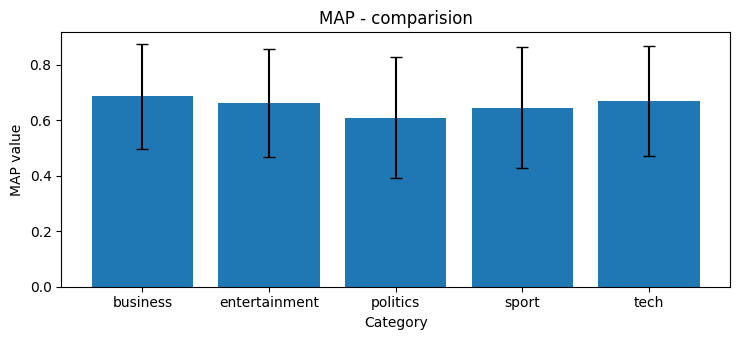

In [25]:
#code, statistics and/or charts here
order_ranked = True
text_processing = False
max_sent = 8
max_chars = 1010
documents = read_files(text_processing)

corpus_index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}

for v in corpus_index:
    corpus_idfs[v] = corpus_index[v].inverted_document_frequency

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})

business_docs = list(filter(lambda d: d.category == "business", documents))
business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)
entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)
politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)
sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)
tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)

print(business, entertainment, politics, sport, tech)
draw_MAP_chart(business, entertainment, politics, sport, tech)

*D.2 Comparison of settings (IR models, preprocessing)*

In [ ]:
#code, statistics and/or charts here
for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF-IDF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### BM25 ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### RRF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### MMR ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

### TF ###
Average Precision:  0.4946281433921884
Average Recall:  0.5935637744756285
Average F-Beta:  0.49911787715213457
Average MAP:  0.6551052358021867
##########
### TF-IDF ###
Average Precision:  0.5067067950775817
Average Recall:  0.6085742480029592
Average F-Beta:  0.5116578843661505
Average MAP:  0.6665697368085826
##########
### BM25 ###
Average Precision:  0.5992348849652219
Average Recall:  0.6987769222427856
Average F-Beta:  0.6018261812008249
Average MAP:  0.8089187750006369
##########
### RRF ###
Average Precision:  0.549852862493312
Average Recall:  0.6500457371509447
Average F-Beta:  0.5535868643167435
Average MAP:  0.7349685749955422
##########


In [ ]:
#code, statistics and/or charts here
order_ranked = True
text_processing = True
max_sent = 8
max_chars = 1010
documents = read_files(text_processing)

corpus_index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}

for v in corpus_index:
    corpus_idfs[v] = corpus_index[v].inverted_document_frequency

In [ ]:
#code, statistics and/or charts here
for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF-IDF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### BM25 ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### RRF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### MMR ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

<H3>Part II: questions materials (optional)</H3>

**(a)** Corpus and summary description. Distribution of informative terms before and after text processing.

In [ ]:
#code, statistics and/or charts here

**(b)** Summarization performance for the overall and category-conditional corpora.

In [ ]:
#code, statistics and/or charts here

In [6]:
#question 2
from operator import attrgetter

from src.mainFunctions.indexing import indexing
from src.helper.documentHelper import read_files
from src.mainFunctions.ranking import ranking

from src.mainFunctions.evaluation import calculate_true_pos
from src.mainFunctions.evaluation import get_MAP_avg_by_cat_and_standard_deviation
from src.mainFunctions.evaluation import draw_MAP_chart
from src.mainFunctions.evaluation import calculate_precision_recall_tables_and_MAP_param
from src.mainFunctions.evaluation import draw_precision_recall_curve
from src.mainFunctions.evaluation import calculate_precision_recall
from src.mainFunctions.evaluation import calculate_fbeta_measure

from src.helper.helper import write_to_csv

order_ranked = True
text_processing = True
documents = read_files(text_processing)
index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}
for v in index:
    corpus_idfs[v] = index[v].inverted_document_frequency
fbeta_list_tf = []
# MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - tf
for document in documents:
    document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})
    true_pos = calculate_true_pos(document)
    precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
    fbeta_list_tf.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
    precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
                                                                             true_pos)
    if document.id == 2:
        draw_precision_recall_curve(precision_recall_tuple_table)

avg_fbeta_tf = sum(fbeta_list_tf) / len(fbeta_list_tf)
print(avg_fbeta_tf)

business_docs = list(filter(lambda d: d.category == "business", documents))
business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)

entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)

politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)

sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)

tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)

draw_MAP_chart(business, entertainment, politics, sport, tech)

fbeta_list_tf_idf = []
# MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - tf-idf
for document in documents:
    document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})
    true_pos = calculate_true_pos(document)
    precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
    fbeta_list_tf_idf.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
    precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
                                                                                   true_pos)
    if document.id == 2:
        draw_precision_recall_curve(precision_recall_tuple_table)

avg_fbeta_tf_idf = sum(fbeta_list_tf_idf) / len(fbeta_list_tf_idf)
print(avg_fbeta_tf_idf)

business_docs = list(filter(lambda d: d.category == "business", documents))
business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)

entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)

politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)

sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)

tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)

draw_MAP_chart(business, entertainment, politics, sport, tech)

fbeta_list_bm25 = []
# MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - bm25
for document in documents:
    document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})
    true_pos = calculate_true_pos(document)
    precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
    fbeta_list_bm25.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
    precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
                                                                                   true_pos)
    if document.id == 2:
        draw_precision_recall_curve(precision_recall_tuple_table)

avg_fbeta_bm25 = sum(fbeta_list_bm25) / len(fbeta_list_bm25)
print(avg_fbeta_bm25)

business_docs = list(filter(lambda d: d.category == "business", documents))
business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)

entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)

politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)

sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)

tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)

draw_MAP_chart(business, entertainment, politics, sport, tech)

fbeta_header = ['all_docs_tf', 'all_docs_tf_idf', 'all_docs_bm25']
fbeta_data = [avg_fbeta_tf, avg_fbeta_tf_idf, avg_fbeta_bm25]
write_to_csv('fbeta.csv', fbeta_header, [fbeta_data])


ImportError: cannot import name 'write_to_csv' from 'src.helper.helper' (D:\STUDIA\Tecnico\RGI_proj\RGIProject\src\helper\helper.py)

In [7]:
#question 4
from operator import attrgetter

from src.mainFunctions.indexing import indexing
from src.helper.documentHelper import read_files
from src.mainFunctions.ranking import ranking

from src.mainFunctions.evaluation import calculate_true_pos
from src.mainFunctions.evaluation import get_MAP_avg_by_cat_and_standard_deviation
from src.mainFunctions.evaluation import draw_MAP_chart
from src.mainFunctions.evaluation import calculate_precision_recall_tables_and_MAP_param
from src.mainFunctions.evaluation import draw_precision_recall_curve
from src.mainFunctions.evaluation import calculate_precision_recall
from src.mainFunctions.evaluation import calculate_fbeta_measure

from src.helper.helper import write_to_csv

def calculate_avg_precision_recall_for_category(category_docs, p, l):
    precision_table = []
    recall_table = []
    for document in category_docs:
        document.summary = ranking(document, p, l, order_ranked, corpus_idfs,
                                   {"rank_option": "tf-idf", "mmr": False})
        true_pos = calculate_true_pos(document)
        precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
        precision_table.append(precision_recall_tuple[0])
        recall_table.append(precision_recall_tuple[1])

    precision_avg = sum(precision_table) / len(recall_table)
    recall_avg = sum(recall_table) / len(recall_table)
    return precision_avg, recall_avg


order_ranked = True
text_processing = True
documents = read_files(text_processing)
index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}
for v in index:
    corpus_idfs[v] = index[v].inverted_document_frequency

row1 = [6, 800]
row2 = [6, 1010]
row3 = [6, 1200]
row4 = [8, 800]
row5 = [8, 1010]
row6 = [8, 1200]
row7 = [10, 800]
row8 = [10, 1010]
row9 = [10, 1200]


all_documents_6_800 = calculate_avg_precision_recall_for_category(documents, 6, 800)
precision_avg_6_800 = all_documents_6_800[0]
recall_avg_6_800 = all_documents_6_800[1]
row1.append(precision_avg_6_800)
row1.append(recall_avg_6_800)

all_documents_6_1010 = calculate_avg_precision_recall_for_category(documents, 6, 1010)
precision_avg_6_1010 = all_documents_6_1010[0]
recall_avg_6_1010 = all_documents_6_1010[1]
row2.append(precision_avg_6_1010)
row2.append(recall_avg_6_1010)

all_documents_6_1200 = calculate_avg_precision_recall_for_category(documents, 6, 1200)
precision_avg_6_1200 = all_documents_6_1200[0]
recall_avg_6_1200 = all_documents_6_1200[1]
row3.append(precision_avg_6_1200)
row3.append(recall_avg_6_1200)

all_documents_8_800 = calculate_avg_precision_recall_for_category(documents, 8, 800)
precision_avg_8_800 = all_documents_8_800[0]
recall_avg_8_800 = all_documents_8_800[1]
row4.append(precision_avg_8_800)
row4.append(recall_avg_8_800)

all_documents_8_1010 = calculate_avg_precision_recall_for_category(documents, 8, 1010)
precision_avg_8_1010 = all_documents_8_1010[0]
recall_avg_8_1010 = all_documents_8_1010[1]
row5.append(precision_avg_8_1010)
row5.append(recall_avg_8_1010)

all_documents_8_1200 = calculate_avg_precision_recall_for_category(documents, 8, 1200)
precision_avg_8_1200 = all_documents_8_1200[0]
recall_avg_8_1200 = all_documents_8_1200[1]
row6.append(precision_avg_8_1200)
row6.append(recall_avg_8_1200)

all_documents_10_800 = calculate_avg_precision_recall_for_category(documents, 10, 800)
precision_avg_10_800 = all_documents_10_800[0]
recall_avg_10_800 = all_documents_10_800[1]
row7.append(precision_avg_10_800)
row7.append(recall_avg_10_800)

all_documents_10_1010 = calculate_avg_precision_recall_for_category(documents, 10, 1010)
precision_avg_10_1010 = all_documents_10_1010[0]
recall_avg_10_1010 = all_documents_10_1010[1]
row8.append(precision_avg_10_1010)
row8.append(recall_avg_10_1010)

all_documents_10_1200 = calculate_avg_precision_recall_for_category(documents, 10, 1200)
precision_avg_10_1200 = all_documents_10_1200[0]
recall_avg_10_1200 = all_documents_10_1200[1]
row9.append(precision_avg_10_1200)
row9.append(recall_avg_10_1200)

business_docs = list(filter(lambda d: d.category == "business", documents))

business_6_800 = calculate_avg_precision_recall_for_category(business_docs, 6, 800)
business_precision_avg_6_800 = business_6_800[0]
business_recall_avg_6_800 = business_6_800[1]
row1.append(business_precision_avg_6_800)
row1.append(business_precision_avg_6_800)

business_6_1010 = calculate_avg_precision_recall_for_category(business_docs, 6, 1010)
business_precision_avg_6_1010 = business_6_1010[0]
business_recall_avg_6_1010 = business_6_1010[1]
row2.append(business_precision_avg_6_1010)
row2.append(business_recall_avg_6_1010)

business_6_1200 = calculate_avg_precision_recall_for_category(business_docs, 6, 1200)
business_precision_avg_6_1200 = business_6_1200[0]
business_recall_avg_6_1200 = business_6_1200[1]
row3.append(business_precision_avg_6_1200)
row3.append(business_recall_avg_6_1200)

business_8_800 = calculate_avg_precision_recall_for_category(business_docs, 8, 800)
business_precision_avg_8_800 = business_8_800[0]
business_recall_avg_8_800 = business_8_800[1]
row4.append(business_precision_avg_8_800)
row4.append(business_recall_avg_8_800)

business_8_1010 = calculate_avg_precision_recall_for_category(business_docs, 8, 1010)
business_precision_avg_8_1010 = business_8_1010[0]
business_recall_avg_8_1010 = business_8_1010[1]
row5.append(business_precision_avg_8_1010)
row5.append(business_recall_avg_8_1010)

business_8_1200 = calculate_avg_precision_recall_for_category(business_docs, 8, 1200)
business_precision_avg_8_1200 = business_8_1200[0]
business_recall_avg_8_1200 = business_8_1200[1]
row6.append(business_precision_avg_8_1200)
row6.append(business_recall_avg_8_1200)

business_10_800 = calculate_avg_precision_recall_for_category(business_docs, 10, 800)
business_precision_avg_10_800 = business_10_800[0]
business_recall_avg_10_800 = business_10_800[1]
row7.append(business_precision_avg_10_800)
row7.append(business_recall_avg_10_800)

business_10_1010 = calculate_avg_precision_recall_for_category(business_docs, 10, 1010)
business_precision_avg_10_1010 = business_10_1010[0]
business_recall_avg_10_1010 = business_10_1010[1]
row8.append(business_precision_avg_10_1010)
row8.append(business_recall_avg_10_1010)

business_10_1200 = calculate_avg_precision_recall_for_category(business_docs, 10, 1200)
business_precision_avg_10_1200 = business_10_1200[0]
business_recall_avg_10_1200 = business_10_1200[1]
row9.append(business_precision_avg_10_1200)
row9.append(business_recall_avg_10_1200)

entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))

entertainment_6_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 800)
entertainment_precision_avg_6_800 = entertainment_6_800[0]
entertainment_recall_avg_6_800 = entertainment_6_800[1]
row1.append(entertainment_precision_avg_6_800)
row1.append(entertainment_precision_avg_6_800)

entertainment_6_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 1010)
entertainment_precision_avg_6_1010 = entertainment_6_1010[0]
entertainment_recall_avg_6_1010 = entertainment_6_1010[1]
row2.append(entertainment_precision_avg_6_1010)
row2.append(entertainment_recall_avg_6_1010)

entertainment_6_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 1200)
entertainment_precision_avg_6_1200 = entertainment_6_1200[0]
entertainment_recall_avg_6_1200 = entertainment_6_1200[1]
row3.append(entertainment_precision_avg_6_1200)
row3.append(entertainment_recall_avg_6_1200)

entertainment_8_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 800)
entertainment_precision_avg_8_800 = entertainment_8_800[0]
entertainment_recall_avg_8_800 = entertainment_8_800[1]
row4.append(entertainment_precision_avg_8_800)
row4.append(entertainment_recall_avg_8_800)

entertainment_8_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 1010)
entertainment_precision_avg_8_1010 = entertainment_8_1010[0]
entertainment_recall_avg_8_1010 = entertainment_8_1010[1]
row5.append(entertainment_precision_avg_8_1010)
row5.append(entertainment_recall_avg_8_1010)

entertainment_8_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 1200)
entertainment_precision_avg_8_1200 = entertainment_8_1200[0]
entertainment_recall_avg_8_1200 = entertainment_8_1200[1]
row6.append(entertainment_precision_avg_8_1200)
row6.append(entertainment_recall_avg_8_1200)

entertainment_10_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 800)
entertainment_precision_avg_10_800 = entertainment_10_800[0]
entertainment_recall_avg_10_800 = entertainment_10_800[1]
row7.append(entertainment_precision_avg_10_800)
row7.append(entertainment_recall_avg_10_800)

entertainment_10_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 1010)
entertainment_precision_avg_10_1010 = entertainment_10_1010[0]
entertainment_recall_avg_10_1010 = entertainment_10_1010[1]
row8.append(entertainment_precision_avg_10_1010)
row8.append(entertainment_recall_avg_10_1010)

entertainment_10_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 1200)
entertainment_precision_avg_10_1200 = entertainment_10_1200[0]
entertainment_recall_avg_10_1200 = entertainment_10_1200[1]
row9.append(entertainment_precision_avg_10_1200)
row9.append(entertainment_recall_avg_10_1200)

politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics_6_800 = calculate_avg_precision_recall_for_category(politics_docs, 6, 800)
politics_precision_avg_6_800 = politics_6_800[0]
politics_recall_avg_6_800 = politics_6_800[1]
row1.append(politics_precision_avg_6_800)
row1.append(politics_precision_avg_6_800)

politics_6_1010 = calculate_avg_precision_recall_for_category(politics_docs, 6, 1010)
politics_precision_avg_6_1010 = politics_6_1010[0]
politics_recall_avg_6_1010 = politics_6_1010[1]
row2.append(politics_precision_avg_6_1010)
row2.append(politics_recall_avg_6_1010)

politics_6_1200 = calculate_avg_precision_recall_for_category(politics_docs, 6, 1200)
politics_precision_avg_6_1200 = politics_6_1200[0]
politics_recall_avg_6_1200 = politics_6_1200[1]
row3.append(politics_precision_avg_6_1200)
row3.append(politics_recall_avg_6_1200)

politics_8_800 = calculate_avg_precision_recall_for_category(politics_docs, 8, 800)
politics_precision_avg_8_800 = politics_8_800[0]
politics_recall_avg_8_800 = politics_8_800[1]
row4.append(politics_precision_avg_8_800)
row4.append(politics_recall_avg_8_800)

politics_8_1010 = calculate_avg_precision_recall_for_category(politics_docs, 8, 1010)
politics_precision_avg_8_1010 = politics_8_1010[0]
politics_recall_avg_8_1010 = politics_8_1010[1]
row5.append(politics_precision_avg_8_1010)
row5.append(politics_recall_avg_8_1010)

politics_8_1200 = calculate_avg_precision_recall_for_category(politics_docs, 8, 1200)
politics_precision_avg_8_1200 = politics_8_1200[0]
politics_recall_avg_8_1200 = politics_8_1200[1]
row6.append(politics_precision_avg_8_1200)
row6.append(politics_recall_avg_8_1200)

politics_10_800 = calculate_avg_precision_recall_for_category(politics_docs, 10, 800)
politics_precision_avg_10_800 = politics_10_800[0]
politics_recall_avg_10_800 = politics_10_800[1]
row7.append(politics_precision_avg_10_800)
row7.append(politics_recall_avg_10_800)

politics_10_1010 = calculate_avg_precision_recall_for_category(politics_docs, 10, 1010)
politics_precision_avg_10_1010 = politics_10_1010[0]
politics_recall_avg_10_1010 = politics_10_1010[1]
row8.append(politics_precision_avg_10_1010)
row8.append(politics_recall_avg_10_1010)

politics_10_1200 = calculate_avg_precision_recall_for_category(politics_docs, 10, 1200)
politics_precision_avg_10_1200 = politics_10_1200[0]
politics_recall_avg_10_1200 = politics_10_1200[1]
row9.append(politics_precision_avg_10_1200)
row9.append(politics_recall_avg_10_1200)

sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport_6_800 = calculate_avg_precision_recall_for_category(sport_docs, 6, 800)
sport_precision_avg_6_800 = sport_6_800[0]
sport_recall_avg_6_800 = sport_6_800[1]
row1.append(sport_precision_avg_6_800)
row1.append(sport_precision_avg_6_800)

sport_6_1010 = calculate_avg_precision_recall_for_category(sport_docs, 6, 1010)
sport_precision_avg_6_1010 = sport_6_1010[0]
sport_recall_avg_6_1010 = sport_6_1010[1]
row2.append(sport_precision_avg_6_1010)
row2.append(sport_recall_avg_6_1010)

sport_6_1200 = calculate_avg_precision_recall_for_category(sport_docs, 6, 1200)
sport_precision_avg_6_1200 = sport_6_1200[0]
sport_recall_avg_6_1200 = sport_6_1200[1]
row3.append(sport_precision_avg_6_1200)
row3.append(sport_recall_avg_6_1200)

sport_8_800 = calculate_avg_precision_recall_for_category(sport_docs, 8, 800)
sport_precision_avg_8_800 = sport_8_800[0]
sport_recall_avg_8_800 = sport_8_800[1]
row4.append(sport_precision_avg_8_800)
row4.append(sport_recall_avg_8_800)

sport_8_1010 = calculate_avg_precision_recall_for_category(sport_docs, 8, 1010)
sport_precision_avg_8_1010 = sport_8_1010[0]
sport_recall_avg_8_1010 = sport_8_1010[1]
row5.append(sport_precision_avg_8_1010)
row5.append(sport_recall_avg_8_1010)

sport_8_1200 = calculate_avg_precision_recall_for_category(sport_docs, 8, 1200)
sport_precision_avg_8_1200 = sport_8_1200[0]
sport_recall_avg_8_1200 = sport_8_1200[1]
row6.append(sport_precision_avg_8_1200)
row6.append(sport_recall_avg_8_1200)

sport_10_800 = calculate_avg_precision_recall_for_category(sport_docs, 10, 800)
sport_precision_avg_10_800 = sport_10_800[0]
sport_recall_avg_10_800 = sport_10_800[1]
row7.append(sport_precision_avg_10_800)
row7.append(sport_recall_avg_10_800)

sport_10_1010 = calculate_avg_precision_recall_for_category(sport_docs, 10, 1010)
sport_precision_avg_10_1010 = sport_10_1010[0]
sport_recall_avg_10_1010 = sport_10_1010[1]
row8.append(sport_precision_avg_10_1010)
row8.append(sport_recall_avg_10_1010)

sport_10_1200 = calculate_avg_precision_recall_for_category(sport_docs, 10, 1200)
sport_precision_avg_10_1200 = sport_10_1200[0]
sport_recall_avg_10_1200 = sport_10_1200[1]
row9.append(sport_precision_avg_10_1200)
row9.append(sport_recall_avg_10_1200)


tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech_6_800 = calculate_avg_precision_recall_for_category(tech_docs, 6, 800)
tech_precision_avg_6_800 = tech_6_800[0]
tech_recall_avg_6_800 = tech_6_800[1]
row1.append(tech_precision_avg_6_800)
row1.append(tech_precision_avg_6_800)

tech_6_1010 = calculate_avg_precision_recall_for_category(tech_docs, 6, 1010)
tech_precision_avg_6_1010 = tech_6_1010[0]
tech_recall_avg_6_1010 = tech_6_1010[1]
row2.append(tech_precision_avg_6_1010)
row2.append(tech_recall_avg_6_1010)

tech_6_1200 = calculate_avg_precision_recall_for_category(tech_docs, 6, 1200)
tech_precision_avg_6_1200 = tech_6_1200[0]
tech_recall_avg_6_1200 = tech_6_1200[1]
row3.append(tech_precision_avg_6_1200)
row3.append(tech_recall_avg_6_1200)

tech_8_800 = calculate_avg_precision_recall_for_category(tech_docs, 8, 800)
tech_precision_avg_8_800 = tech_8_800[0]
tech_recall_avg_8_800 = tech_8_800[1]
row4.append(tech_precision_avg_8_800)
row4.append(tech_recall_avg_8_800)

tech_8_1010 = calculate_avg_precision_recall_for_category(tech_docs, 8, 1010)
tech_precision_avg_8_1010 = tech_8_1010[0]
tech_recall_avg_8_1010 = tech_8_1010[1]
row5.append(tech_precision_avg_8_1010)
row5.append(tech_recall_avg_8_1010)

tech_8_1200 = calculate_avg_precision_recall_for_category(tech_docs, 8, 1200)
tech_precision_avg_8_1200 = tech_8_1200[0]
tech_recall_avg_8_1200 = tech_8_1200[1]
row6.append(tech_precision_avg_8_1200)
row6.append(tech_recall_avg_8_1200)

tech_10_800 = calculate_avg_precision_recall_for_category(tech_docs, 10, 800)
tech_precision_avg_10_800 = tech_10_800[0]
tech_recall_avg_10_800 = tech_10_800[1]
row7.append(tech_precision_avg_10_800)
row7.append(tech_recall_avg_10_800)

tech_10_1010 = calculate_avg_precision_recall_for_category(tech_docs, 10, 1010)
tech_precision_avg_10_1010 = tech_10_1010[0]
tech_recall_avg_10_1010 = tech_10_1010[1]
row8.append(tech_precision_avg_10_1010)
row8.append(tech_recall_avg_10_1010)

tech_10_1200 = calculate_avg_precision_recall_for_category(tech_docs, 10, 1200)
tech_precision_avg_10_1200 = tech_10_1200[0]
tech_recall_avg_10_1200 = tech_10_1200[1]
row9.append(tech_precision_avg_10_1200)
row9.append(tech_recall_avg_10_1200)


header = ["p", "l", "all_docs_precision", "all_docs_recall", "business_precision", "business_recall","entertainment_precision", "entertainment_recall","politics_precision", "politics_recall","sport_precision", "sport_recall","tech_precision", "tech_recall"]
data = [row1, row2, row3, row4, row5, row6, row7, row8, row9]
write_to_csv('precision_recall.csv', header, data)

ImportError: cannot import name 'write_to_csv' from 'src.helper.helper' (D:\STUDIA\Tecnico\RGI_proj\RGIProject\src\helper\helper.py)

**...** (additional questions with empirical results)

<H3>Part III: Other caluclations to support the project</H3>

In [ ]:
# get average sentences and characters of the reference summaries
from helper.documentHelper import read_files
totalSentences = 0
totalCharacters = 0
totalDocuments = 0
documents = read_files(False)

for document in documents:
    sentences = document.referenceSummary
    totalSentences += len(sentences)
    totalCharacters += len(" ".join(sentences))
    totalDocuments +=1

print("avg sentences", totalSentences / totalDocuments)
print("avg characters", totalCharacters /totalDocuments)

<H3>END</H3>